In [2]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# how are monthly payments (equated monthly installment) is calculated
# calculating a montly payment (simplified)

P = 31115 * (1.075)
r = 0.0702 / 12
n = 60
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1
emi = P * (numerator / denominator)

np.round(emi,2)



662.64

In [4]:
#Calculating Monthly Pyment (with some fees included)

# No,w in Los Angeles which has a total sales tax rate of 9.75%

# Emissions testing fee: $50
# Registration Fee: $200
# Plate Transfer Fee: $65
# California Documentation Fee: $80

P = 31115 + (32615 * 0.0975) + 50 + 200 + 65 + 80
r = 0.0702 / 12
n = 60
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1
emi = P * (numerator/ denominator)
np.round(emi,2)

687.23

In [5]:
'The Monthly Payment with fees included is {} higher'.format(np.round(687.23 - 662.64,2))

'The Monthly Payment with fees included is 24.59 higher'

In [6]:
# How Interest Rates/APR Affects Monthly Payments

# Calculate Total Interest Paid
'''
Here are the steps to do this

1-) Divide your interest rate by the number of payments 
(12) you'll make in the year (interest rates are expressed annually).


'''

"\nHere are the steps to do this\n\n1-) Divide your interest rate by the number of payments \n(12) you'll make in the year (interest rates are expressed annually).\n\n\n"

In [7]:
# Calculate one month of interest
P = 34689.9625
r = 0.0702 / 12

r * P

202.93628062500002

In [8]:
#Calculate new principal (after one payment)

34689.9625 - (687.23 - 202.94)

34205.6725

In [9]:
# Repeat steps 1 and 2 using the new principal until the principal reaches 0. You can see can example of this in the Python code below.

In [10]:
import numpy as np
import pandas as pd

term = 60
P = 34205.6725


def calc_interest(P,emi,interest_rate = 0.0702):
    interest_paid = np.floor(((interest_rate/12)*P)*100)/100
    principal_paid = np.round(emi-interest_paid, 2)
    new_balance = np.round(P - principal_paid,2)
    return(emi, interest_paid, principal_paid, new_balance)


payment_list = []

for n in range(1, term + 1):
    emi,i_paid,p_paid,new_p = calc_interest(P, emi)
    payment_list.append([n, P, emi, i_paid, p_paid, new_p])
    P = np.round(new_p,2)
    
    
    
    

In [11]:
c_names = ['Month','Starting Balance','Repayment','Interest Paid','Principal Paid','New Balance']
payment_table = pd.DataFrame(payment_list, columns = c_names)

In [12]:
payment_table.head(20)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
0,1,34205.6725,687.230218,200.10,487.13,33718.54
1,2,33718.5400,687.230218,197.25,489.98,33228.56
2,3,33228.5600,687.230218,194.38,492.85,32735.71
3,4,32735.7100,687.230218,191.50,495.73,32239.98
4,5,32239.9800,687.230218,188.60,498.63,31741.35
5,6,31741.3500,687.230218,185.68,501.55,31239.80
6,7,31239.8000,687.230218,182.75,504.48,30735.32
7,8,30735.3200,687.230218,179.80,507.43,30227.89
8,9,30227.8900,687.230218,176.83,510.40,29717.49
9,10,29717.4900,687.230218,173.84,513.39,29204.10


In [13]:
np.round(payment_table['Interest Paid'].sum(), 2)

6340.57

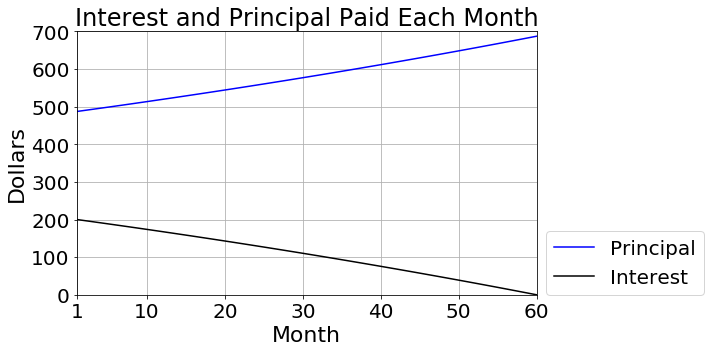

In [14]:
# Loan and Principal Plot

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )

axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = 'Principal')
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = 'Interest')

axes.set_xlim((1, 60))
axes.set_xticks([1, 10, 20, 30, 40, 50, 60])

axes.set_ylim((0, 700));

axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')
